In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('./ok.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),NaN,3487.95,No


In [4]:
data = data.drop(columns = ['customerID'])

In [5]:
data.isna().sum()

gender               9
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService     16
OnlineSecurity      23
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      15
TotalCharges        24
Churn                0
dtype: int64

In [37]:
#Deciding wheter to apply median or mean in Monthly charges and Total charges

In [38]:
#data['TotalCharges'].apply(lambda x: 0 if x.dtype != float else x)

In [6]:
def numa(x):
    try:
        return float(x)
    except:
        return np.nan

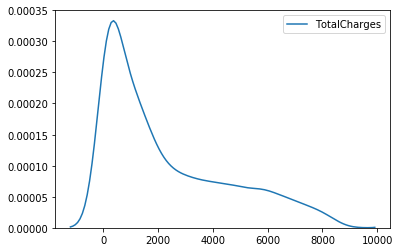

In [8]:
data['TotalCharges'] = data['TotalCharges'].apply(numa)
#a.hist()
sns.kdeplot(data['TotalCharges'])
#As the data is skewed to the right , we will use median

In [9]:
median = data['TotalCharges'].median()

In [11]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: median if x == " " else x)

In [14]:
data['MonthlyCharges'] = data['MonthlyCharges'].apply(numa)

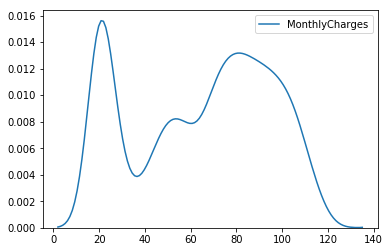

In [15]:
sns.kdeplot(data['MonthlyCharges'])

In [17]:
mean = data['MonthlyCharges'].mean()
data['MonthlyCharges'] = data['MonthlyCharges'].apply(lambda x : mean if x == " " else x)

In [41]:
data.notna().sum()

gender              7034
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7027
OnlineSecurity      7020
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7028
TotalCharges        7019
Churn               7043
dtype: int64

In [25]:
a = pd.DataFrame(data.isnull().sum(axis = 1))

In [26]:
a[a.values != 0].count()

0    68
dtype: int64

In [29]:
#ALternate way
len(data.dropna())
#Number of 

6975

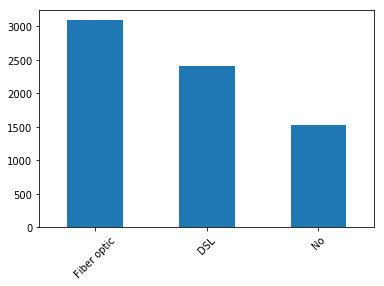

In [30]:
data['InternetService'].value_counts().plot.bar()
plt.xticks(rotation = 45)
plt.show()

In [32]:
data['MonthlyCharges'].apply(math.sqrt).skew()

-0.48537265553662123

In [33]:
data['MonthlyCharges'].apply(np.log).skew() 

-0.7296974324305798

In [22]:
data1 = pd.get_dummies(data, drop_first = True)
data1

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,8,99.65,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
6,0,22,89.10,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,10,29.75,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,28,104.80,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
9,0,62,NaN,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
